In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns
from astropy import units as u
from astropy import constants as c
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# you need exodata from github
import exodata

In [3]:
exocat = exodata.load_db_from_url()

In [4]:
import matplotlib.font_manager as fm
#fm.findSystemFonts()
plt.rcParams['font.family']='FreeSerif'

In [5]:
planet = exocat.planets

You will see many errors in the next step, but IGNORE them

In [7]:
q=[]
j=0
err=0
for p in planet:
    if hasattr(p,"ra") and p.d is not np.nan:
        try:
            q.append([p.d.magnitude,p.ra,p.dec])
            j=j+1
        except:
            err=err+1
        if np.mod(j,100)==0:
            print(j,len(planet))

ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any provided magnitudes
ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any pr

100 3655
200 3655
300 3655
400 3655
500 3655
600 3655
700 3655
800 3655


ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any provided magnitudes
ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any pr

900 3655


ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any provided magnitudes
ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any pr

1000 3655
1100 3655
1200 3655
1300 3655
1400 3655
1500 3655
1600 3655
1700 3655


ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any provided magnitudes
ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any pr

1800 3655
1900 3655
2000 3655


In [8]:
x=[]
y=[]
z=[]
for pla in q:
    d=pla[0]
    ra=pla[1]
    dec=pla[2]
    c = SkyCoord(ra,dec,distance=d*u.pc,frame='icrs')
    cc=c.transform_to('galactic')
    x.append(cc.cartesian.x.value)
    y.append(cc.cartesian.y.value)
    z.append(cc.cartesian.z.value)

In [9]:
galcen=SkyCoord("17h45m40.04s","−29d00m28.1s",distance=8700*u.pc,frame='icrs')
gc=galcen.transform_to('galactic')
gx=gc.cartesian.x.value
gy=gc.cartesian.y.value
gz=gc.cartesian.z.value

In [10]:
#change as you want
%matplotlib tk 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(x,y,z)
ax.scatter3D(gx,gy,gz,color="black",s=100,marker="+")
plt.show()

/home/kawahara/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


## Distribution

/home/kawahara/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


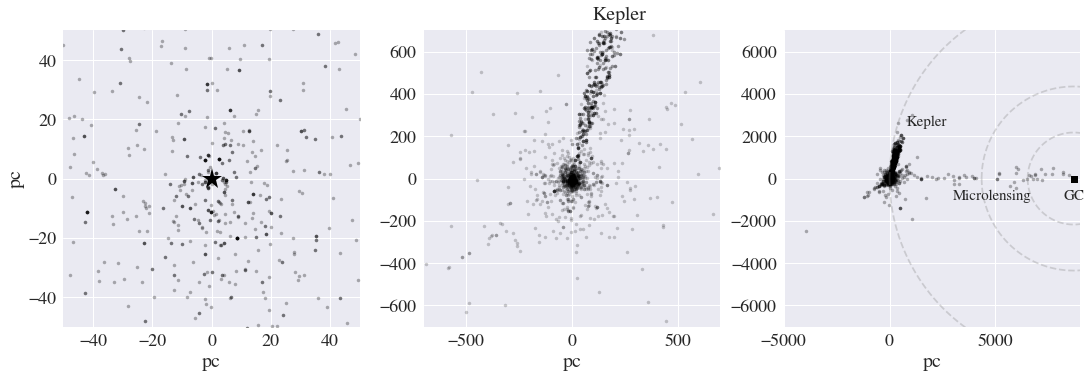

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(15.2,5))
ax=fig.add_subplot(133)
ax.plot(gx,gy,"s",color="black")
ax.plot(x,y,".",color="black",alpha=0.3)
#gal
for r in [gx/4,gx/2,gx]:
    xcir=np.linspace(-r,r,1000)+gx
    ycir=np.sqrt(-(xcir-gx)**2+r**2)
    ax.plot(xcir,ycir,color="gray",alpha=0.3,ls="dashed")
    ax.plot(xcir,-ycir,color="gray",alpha=0.3,ls="dashed")

plt.xlim(-5000,9000)
plt.ylim(-7000,7000)
ax.text(800,2500,"Kepler",fontsize=15)
ax.text(3000,-1000,"Microlensing",fontsize=15)
ax.text(gx-500,-1000,"GC",fontsize=15)
plt.tick_params(labelsize=18)
plt.xlabel("pc",fontsize=20)
ax.set_aspect(1/ax.get_data_ratio())

ax=fig.add_subplot(132)
ax.plot(x,y,".",color="black",alpha=0.2)
plt.xlim(-700,700)
plt.ylim(-700,700)
plt.tick_params(labelsize=18)
plt.xlabel("pc",fontsize=20)
ax.set_aspect(1/ax.get_data_ratio())
ax.text(100,750,"Kepler",fontsize=20)

ax=fig.add_subplot(131)
ax.plot(x,y,".",color="black",alpha=0.3)
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.tick_params(labelsize=18)
plt.xlabel("pc",fontsize=20)
plt.ylabel("pc",fontsize=20)
ax.plot(0,0,"*",color="black",markersize=22)
ax.set_aspect(1/ax.get_data_ratio())
#ax.plot(gx,gy,"+")
#plt.savefig("positions.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()

## Distance - stellar temperature

In [12]:
qq=[]
j=0
for p in planet:
    if p.d is not np.nan and 'temperature' in p.parent.params:
        qq.append([p.d.magnitude,p.parent.params["temperature"].magnitude])
    j=j+1
qq=np.array(qq)

ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any provided magnitudes
ERROR:root:Could not convert from any provided magnitudes
Traceback (most recent call last):
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 506, in _get_or_convert_magnitude
    mag_conversion = mag_class.convert(mag_letter)
  File "/home/kawahara/anaconda3/lib/python3.6/site-packages/exodata/astroclasses.py", line 1195, in convert
    raise ValueError('Could not convert from any provided magnitudes')
ValueError: Could not convert from any pr

In [14]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

/home/kawahara/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


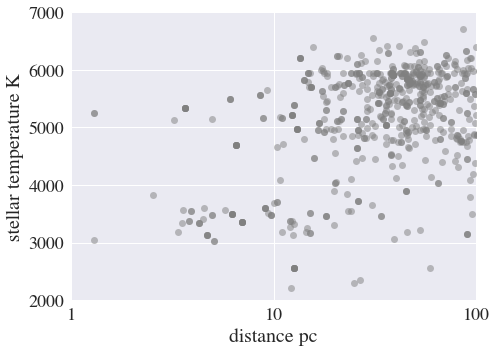

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(7,5))
ax=fig.add_subplot(111)
ax.plot(qq[:,0],qq[:,1],"o",color="gray",alpha=0.5)
plt.tick_params(labelsize=18)
plt.xscale("log")
#plt.yscale("log")
plt.ylim(2000,7000)
plt.xlim(1,100)
plt.xlabel("distance pc",fontsize=20)
plt.ylabel("stellar temperature K",fontsize=20)
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
#plt.savefig("dteff.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()